In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("E95_price_1.csv", index_col = 'year', parse_dates = True)
df.tail()

,E95
year,
2022-11-11,23860
2022-11-21,23780
2022-12-01,22700
2022-12-12,21200
2022-12-21,20700


In [3]:
df['Time'] = np.arange(len(df.index))
df.tail()

,E95,Time
year,,
2022-11-11,23860,102
2022-11-21,23780,103
2022-12-01,22700,104
2022-12-12,21200,105
2022-12-21,20700,106


In [4]:
x = df.loc[:, ['Time']]
y = df.loc[:, 'E95']

# Train the model
model = LinearRegression()
model.fit(x, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(x), index=x.index)

In [5]:
def split_data(data, test_split):
    l = len(data)
    t_idx = int(round((l*(1-test_split)),5))
    train = df.E95[:t_idx]
    test = df.E95[t_idx:]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [6]:
# Create Training and Test
test_size = 0.1
train,test = split_data(df,test_size)


train: 96 , test: 11


In [7]:
print('Train:', len(train))
print('Test:', len(test))

Train: 96
Test: 11


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
print(len(y_test))

11


In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

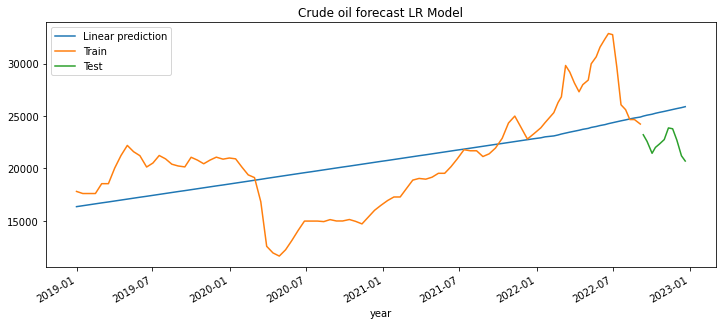

In [10]:
plt.figure(figsize = (12,5))
plt.title('Crude oil forecast LR Model')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mse =  mean_squared_error(y_test,test)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test,test)
print("MSE: ", mse)
print("MAPE: ", mape )

MSE:  22356200.0
MAPE:  0.23812203476046953
